<a href="https://colab.research.google.com/github/dukeahmadi/dukeahmadi/blob/main/titnaic_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

from sklearn.metrics import f1_score
# LOADING LIBRARIES
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential, Model
from keras.layers import Dense, Input

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))
print('done')

done


In [35]:
train = pd.read_csv('/content/trainkhodesh .csv.csv')

test = pd.read_csv('/content/testkhodesh.csv.csv')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,5.0,7.2500,2.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,17599.0,71.2833,2.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,2.0,7.9250,2.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803.0,53.1000,2.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450.0,8.0500,2.0,1.0


In [37]:
X = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Ticket']]
#didnt use Title
y = train['Survived']
X_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Ticket']]

In [38]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 30 )

In [39]:
X_train.shape , y_train.shape

((861, 9), (861,))

In [40]:
print(X_test.shape)
print(y_test.shape)



(30, 9)
(30,)


In [41]:
X_train.shape[1]

9

In [42]:
# The size of encoded and actual representations
encoding_dim = 4
actual_dim = X_train.shape[1]

In [43]:
# Input placeholder
input_attrs = Input(shape=(actual_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_attrs)

#
classifier = Dense(1, activation='sigmoid', kernel_initializer='normal')(encoded)

In [44]:
# this model maps an input to its reconstruction
autoencoder_classifier = Model(inputs=input_attrs, outputs=classifier)

In [45]:
print(autoencoder_classifier.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
autoencoder_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
autoencoder_classifier.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6083 - loss: 0.6684 - val_accuracy: 0.6000 - val_loss: 0.6610
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6135 - loss: 0.6642 - val_accuracy: 0.6000 - val_loss: 0.6608
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6221 - loss: 0.6623 - val_accuracy: 0.6000 - val_loss: 0.6608
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6289 - loss: 0.6591 - val_accuracy: 0.6000 - val_loss: 0.6607
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6156 - loss: 0.6651 - val_accuracy: 0.6000 - val_loss: 0.6607
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6164 - loss: 0.6634 - val_accuracy: 0.6000 - val_loss: 0.6605
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6098 - loss: 0.6682 - val_accuracy: 0.6000 - val_loss: 0.6605
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6286 - loss: 0.6595 - val_accuracy: 0.6000 - val_loss: 0.6603


In [50]:
from sklearn.metrics import f1_score

y_pre = autoencoder_classifier.predict(X_test)

y_pre = np.round(y_pre)

f1 = f1_score(y_test, y_pre)
print(f"F1 Score: {f1:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
F1 Score: 0.00


In [51]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout

def build_fn(lyrs=[8], act='relu', dr=0.0, encoding_dim=4, opt='adam'):
    # Define the input
    input_attrs = Input(shape=(actual_dim,))

    # Build the hidden layers
    x = input_attrs
    for units in lyrs:
        x = Dense(units, activation=act)(x)
        if dr > 0.0:
            x = Dropout(dr)(x)

    # Encoding layer
    encoded = Dense(encoding_dim, activation=act)(x)

    # Output layer
    classifier = Dense(1, activation='sigmoid', kernel_initializer='normal')(encoded)

    # Create the model
    model = Model(inputs=input_attrs, outputs=classifier)

    # Compile the model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [52]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam

class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=100, batch_size=32, verbose=0, lyrs=[8], act='relu', dr=0.0, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.lyrs = lyrs
        self.act = act
        self.dr = dr
        self.kwargs = kwargs

    def build_model(self):
        return self.build_fn(lyrs=self.lyrs, act=self.act, dr=self.dr, **self.kwargs)

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.compile(optimizer=self.kwargs.get('opt', 'Adam'),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
        self.history = self.model.fit(X, y,
                                      epochs=self.epochs,
                                      batch_size=self.batch_size,
                                      verbose=self.verbose,
                                      validation_split=0.2)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype('int32')

    def get_params(self, deep=True):
        return {'build_fn': self.build_fn,
                'epochs': self.epochs,
                'batch_size': self.batch_size,
                'verbose': self.verbose,
                'lyrs': self.lyrs,
                'act': self.act,
                'dr': self.dr,
                **self.kwargs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [53]:
custom_classifier = CustomKerasClassifier(build_fn=build_fn, epochs=100, batch_size=256, verbose=1)

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'lyrs': [
        [8], [16, 8], [32, 16, 8],          # Different layer configurations
        [64, 32, 16], [128, 64, 32, 16]     # Adding more complex configurations
    ],
    'act': ['relu', 'tanh', 'sigmoid', 'elu'],  # Adding more activation functions
    'dr': [0.0, 0.2, 0.4, 0.5],                # More dropout rates
    'opt': ['adam', 'rmsprop', 'sgd', 'adamax'], # Adding more optimizers
    'encoding_dim': [4, 16],               # Different dimensions for the encoding layer
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=custom_classifier, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [20]:
# If needed, you can also get the best model
best_model = grid_result.best_estimator_.model

In [21]:
# Get the configuration of the model (layers, activation functions, etc.)
model_config = best_model.get_config()
print("Model configuration:")
print(model_config)

# Get the optimizer configuration
optimizer_config = best_model.optimizer.get_config()
print("Optimizer configuration:")
print(optimizer_config)

# Get the learning rate
learning_rate = best_model.optimizer.learning_rate.numpy()
print(f"Learning rate: {learning_rate}")

# Get the loss function
loss_function = best_model.loss
print(f"Loss function: {loss_function}")

# Get the metrics used
metrics = best_model.metrics_names
print(f"Metrics: {metrics}")

Model configuration:
{'name': 'functional_1', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 9), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None, 'name': 'input_layer_1', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 32, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 9)}, 

In [22]:
from tensorflow.keras.optimizers import Adam

# Get the current optimizer
optimizer = best_model.optimizer

# Set a new learning rate
new_learning_rate = 0.00001  # مقدار جدید لرنینگ ریت

# Update the learning rate in the optimizer
optimizer.learning_rate.assign(new_learning_rate)

# Recompile the model with the updated optimizer
best_model.compile(optimizer=optimizer,
                   loss=best_model.loss,
                   metrics=best_model.metrics)

print(f"Updated learning rate: {optimizer.learning_rate.numpy()}")

Updated learning rate: 9.999999747378752e-06


In [23]:
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

In [31]:
best_model.compile(optimizer=best_model.optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = best_model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test))


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6285 - loss: 0.6730 - val_accuracy: 0.6000 - val_loss: 0.6618
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6172 - loss: 0.6757 - val_accuracy: 0.6000 - val_loss: 0.6460
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6204 - loss: 0.6773 - val_accuracy: 0.6667 - val_loss: 0.6461
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6194 - loss: 0.6774 - val_accuracy: 0.6000 - val_loss: 0.6532
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6249 - loss: 0.6830 - val_accuracy: 0.6000 - val_loss: 0.6501
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6277 - loss: 0.6932 - val_accuracy: 0.6333 - val_loss: 0.6456
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6389 - loss: 0.6571 - val_accuracy: 0.6000 - val_loss: 0.6477
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6334 - loss: 0.6695 - val_accuracy: 0.6000 - val_loss:

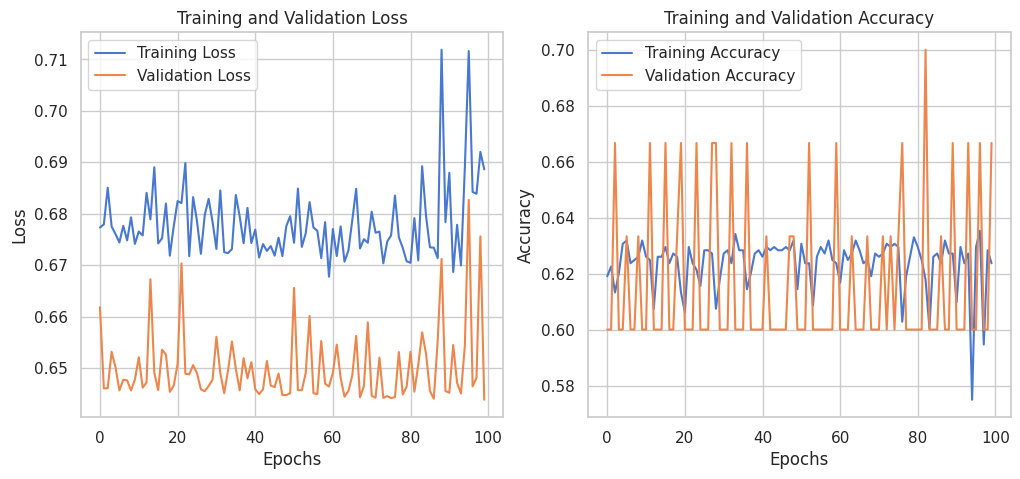

In [32]:
import matplotlib.pyplot as plt

# Extract the history of training and validation loss
train_loss = best_model.history.history['loss']
val_loss = best_model.history.history['val_loss']

# Extract the history of training and validation accuracy
train_acc = best_model.history.history['accuracy']
val_acc = best_model.history.history['val_accuracy']

# Create a figure for the loss plot
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Create a figure for the accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.show()

In [33]:

y_hat = best_model.predict(X_test)

y_hat = np.round(y_hat)

f1 = f1_score(y_test, y_hat)
print(f"F1 Score: {f1:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
F1 Score: 0.72
